In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

### 기하학적 변형 코드
- Translation (상하, 좌우 이동)
- Rotation (그림의 회전 ,중심축 선택)
- Flipping (수평, 수직으로 뒤집기)
- 어핀 변화 / 원근 변화

**Translation**

(598, 800, 3)


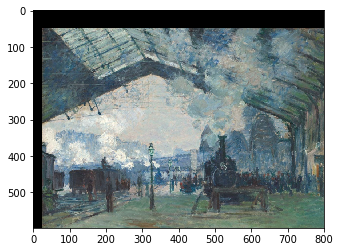

In [6]:
image = cv.imread('img/Train.jpg')
# X 방향으로 25, Y 방향으로 50 이동할때
M = np.float32([[1, 0, 25], [0, 1, 50]])

# M = 변환 행렬 , dszie : manual size
print(image.shape)
shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB))
plt.show()

**Rotation**

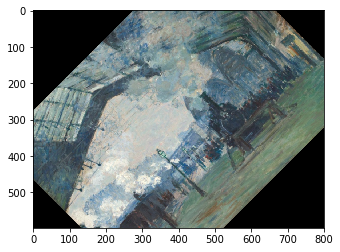

In [8]:
# Rotation
image = cv.imread('img/Train.jpg')
 
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)
 
# rotate , 45도 변환 행렬 생성
M = cv.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv.warpAffine(image, M, (w, h))
plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))
plt.show()

**Flipping**

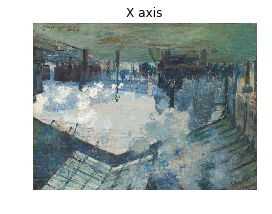

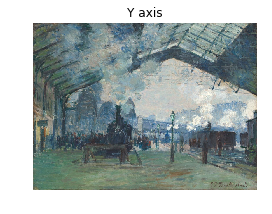

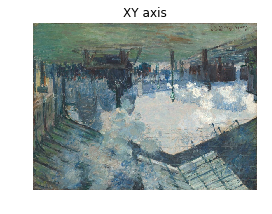

In [16]:
# Flipping
image = cv.imread('img/Train.jpg')
 
# X축 뒤집기
flipped_x = cv.flip(image, 0)
# Y축 뒤집기
flipped_y = cv.flip(image, 1)
# X, Y축 동시
flipped_xy = cv.flip(image, -1)

plt.figure(figsize=(4,4))
plt.title("X axis")
plt.imshow(cv.cvtColor(flipped_x, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
plt.figure(figsize=(4,4))
plt.title("Y axis")
plt.imshow(cv.cvtColor(flipped_y, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
plt.figure(figsize=(4,4))
plt.title("XY axis")
plt.imshow(cv.cvtColor(flipped_xy, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Affine Transform**

Affine Transformation은 선의 평행성은 유지가 되면서 이미지를 변환하는 작업이다. 
이동, 확대, Scale, 반전까지 포함된 변환. 
Affine 변환을 위해서는 3개의 Match가 되는 점이 있으면 변환행렬을 구할 수 있다.

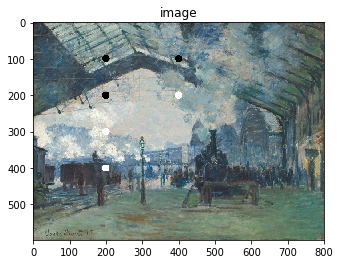

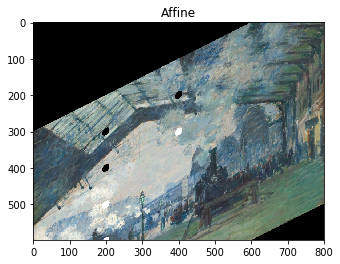

(<matplotlib.image.AxesImage at 0x1eeed07a978>, Text(0.5, 1.0, 'Affine'), None)

In [28]:
image = cv.imread('img/Train.jpg')
rows, cols, ch = image.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv.circle(image, (200,100), 10, (0,0,0),-1)
cv.circle(image, (400,100), 10, (0,0,0),-1)
cv.circle(image, (200,200), 10, (0,0,0),-1)
# 검은점 > 하얀점으로 대응.
cv.circle(image, (200,300), 10, (255,255,255),-1)
cv.circle(image, (400,200), 10, (255,255,255),-1)
cv.circle(image, (200,400), 10, (255,255,255),-1)

M = cv.getAffineTransform(pts1, pts2)

dst = cv.warpAffine(image, M, (cols,rows))

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)),plt.title('image'),plt.show()
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)),plt.title('Affine'),plt.show()

### Perspective Transformation 원근 변화

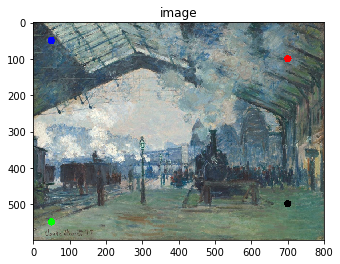

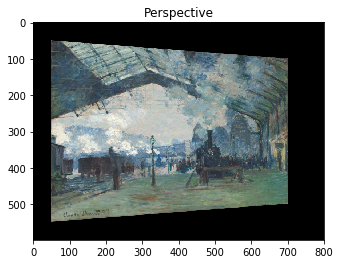

(<matplotlib.image.AxesImage at 0x1eeed9953c8>,
 Text(0.5, 1.0, 'Perspective'),
 None)

In [38]:
image = cv.imread('img/Train.jpg')
image_ = image.copy()
rows, cols, ch = image.shape

# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
# 이동하는 점
pts2 = np.float32([[50,50],[50,rows-50],[cols-100,100],[cols-100,rows-100]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv.circle(image, (50,50), 10, (255,0,0),-1)
cv.circle(image, (50,rows-50), 10, (0,255,0),-1)
cv.circle(image, (cols-100,100), 10, (0,0,255),-1)
cv.circle(image, (cols-100,rows-100), 10, (0,0,0),-1)

# 4개의 점을이용
M = cv.getPerspectiveTransform(pts1, pts2)

dst = cv.warpPerspective(image_, M, (800,598))

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)),plt.title('image'),plt.show()
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)),plt.title('Perspective'),plt.show()

(250, 289, 3)


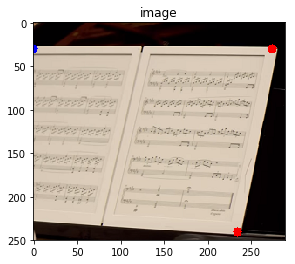

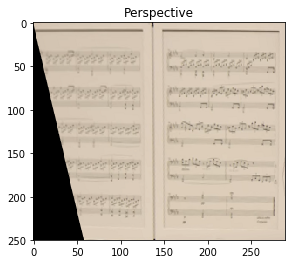

(<matplotlib.image.AxesImage at 0x1eef0298198>,
 Text(0.5, 1.0, 'Perspective'),
 None)

In [63]:
# 원근법 이용해 비스듬한 이미지 변환
image = cv.imread('img/score.png')
image_ = image.copy()
rows, cols, ch = image.shape
# (250, 289, 3)
print(image.shape)

# # 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[0,30],[-55,rows-25],[cols-15,30],[cols-55,rows-10]])
# 이동하는 점
pts2 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv.circle(image, (0,30), 5, (255,0,0),-1)
# 안보이는 왼쪽점을 처리
cv.circle(image, (-30,rows-25), 5, (0,255,0),-1)
cv.circle(image, (cols-15,30), 5, (0,0,255),-1)
cv.circle(image, (cols-55,rows-10), 5, (0,0,255),-1)

# 4개의 점을이용
M = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(image_, M, (289,250))

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)),plt.title('image'),plt.show()
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)),plt.title('Perspective'),plt.show()